In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [11]:
survey_df = pd.read_csv("ESSdata_Thinkful.csv")

In [12]:
survey_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


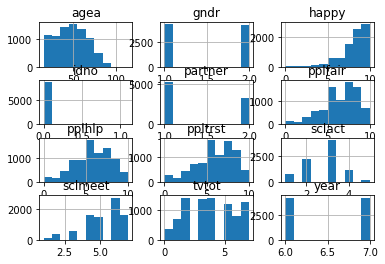

In [13]:
#Show histogram to determine how normal our distributions are.
#survey_df.hist(sharey=True,sharex=True)
survey_df.hist()
plt.show()

In [14]:
#More statisticall information
survey_df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


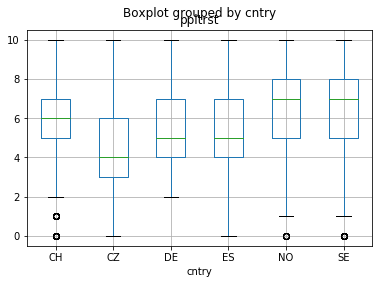

In [25]:
#use a boxplot to show the statistically information.
#show boxplot for year 2014
survey_df.loc[survey_df['year']==6]
survey_df.boxplot('ppltrst','cntry')
plt.show()

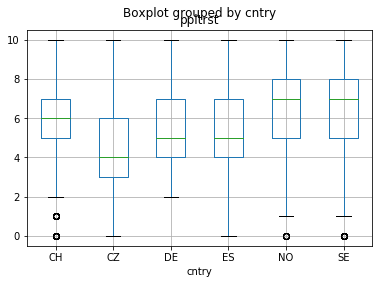

In [26]:
#show boxplot for year 2012
survey_df.loc[survey_df['year']==7]
survey_df.boxplot('ppltrst','cntry')
plt.show()

In [16]:
#ppltrst is reasonably distributed but year is not, so I thought I would use both 
#statistical methods for parametric and non-parmetric to compare
# Printing the means for each group.

#F, p = stats.f_oneway(
#    survey_df['year'],
#    survey_df['ppltrst'])

F, p = stats.f_oneway(
    survey_df.loc[survey_df['year']==6,'ppltrst'],
    survey_df.loc[survey_df['year']==7,'ppltrst'])



# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

nan
nan


In [17]:
#drop the column with NaN and rerun the statistics
survey_df_st = survey_df[['year','ppltrst']].dropna()

In [18]:
# Printing the means for each group.

#F, p = stats.f_oneway(
#    survey_df_st['year'],
#    survey_df_st['ppltrst'])

F, p = stats.f_oneway(survey_df_st.loc[survey_df['year']==6,'ppltrst'],
                      survey_df_st.loc[survey_df['year']==7,'ppltrst'])

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population. But a p > .05 would indicate the group means are similar
# therefore our results indicate the probablity are similar.
print(p)

0.017483477224558622
0.8948093492517359


In [19]:
print(stats.ttest_ind(survey_df_st['year'], survey_df_st['ppltrst']))
#print(stats.ttest_ind(survey_df['Steel'], coaster_heights['Plastic']))
#print(stats.ttest_ind(survey_df['Plastic'], coaster_heights['Wood']))

Ttest_indResult(statistic=38.05689823412604, pvalue=2.567398458947772e-304)


In [24]:
# Kruskal-Wallace Test used for non-parmetric test

# Join all ratings together into a list, then ranking them.
ranks = stats.rankdata(
    survey_df_st.loc[survey_df['year']==6,'ppltrst'].tolist() +
    survey_df_st.loc[survey_df['year']==7,'ppltrst'].tolist())

# Add the new ranked variables to the data frame.
survey_df_st['year'] = ranks[0:len(survey_df_st['year'])]
#survey_df_st['ppltrst'] = ranks[len(survey_df_st['ppltrst'])]

# Average rank per group.
groups = ['year', 'ppltrst']
print(survey_df_st[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(
    survey_df_st['year'],
    survey_df_st['ppltrst'])

year       4290.500000
ppltrst       5.559907
dtype: float64
4290.5


KruskalResult(statistic=12939.793845483628, pvalue=0.0)

In [188]:
#Outcome:
#it appears the groups are similar as we have a 0 pvalue. 
# basically we have a 0% chance of getting our data if there were no systematic difference between
# the year and ppltrst.

In [189]:
#1) Did people become less trusting from 2012 to 2014? 
#Compute results for each country in the sample.
#Answer: people trust grew slightly for some countries and was slightly less for others from 
#2012 to 2014.

In [190]:
survey_df[['ppltrst','year']].head()

,ppltrst,year
0,3.0,6
1,5.0,6
2,8.0,6
3,6.0,6
4,6.0,6


In [191]:
ppltrst_df = survey_df.groupby(['year','cntry']).sum()['ppltrst']
ppltrst_df

year  cntry
6     CH       4389.0
      CZ       2840.0
      DE         73.0
      ES       6204.0
      NO       4854.0
      SE       5489.0
7     CH       4446.0
      CZ       2907.0
      DE         75.0
      ES       5928.0
      NO       4817.0
      SE       5682.0
Name: ppltrst, dtype: float64

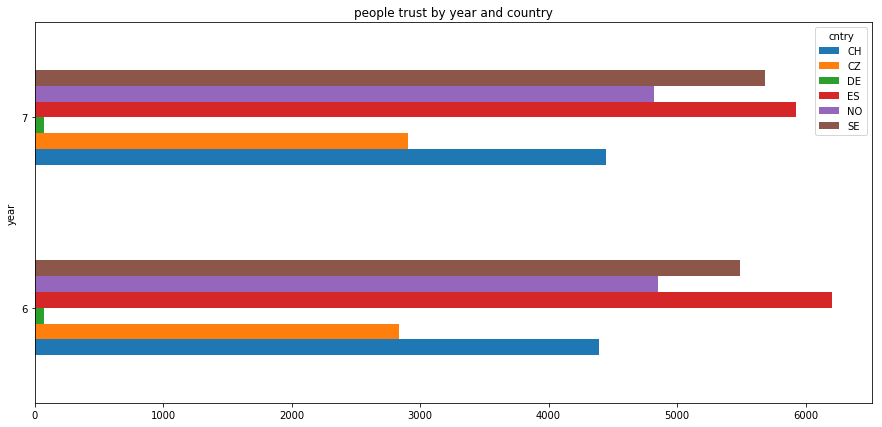

In [192]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ppltrst_df = survey_df.groupby(['year','cntry']).sum()['ppltrst'].unstack().plot(kind='barh',ax=ax, title='people trust by year and country')

In [193]:
#2) Did people become happier from 2012 to 2014? 
#Compute results for each country in the sample.
#Answer: people's happiness grew slightly for some countries and was slightly less for others from 
#2012 to 2014.

In [194]:
happy_df = survey_df.groupby(['year','cntry']).sum()['happy']
happy_df

year  cntry
6     CH       6228.0
      CZ       4374.0
      DE        104.0
      ES       9149.0
      NO       5999.0
      SE       7172.0
7     CH       6274.0
      CZ       4508.0
      DE        110.0
      ES       8993.0
      NO       5786.0
      SE       7192.0
Name: happy, dtype: float64

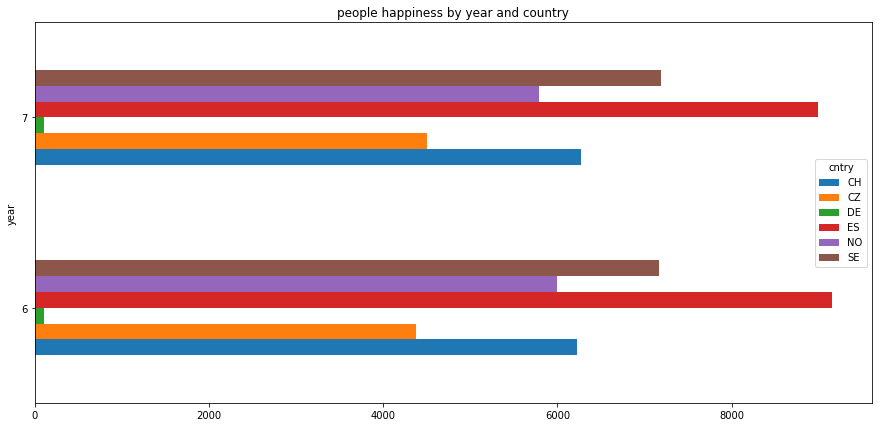

In [195]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
happy_df = survey_df.groupby(['year','cntry']).sum()['happy'].unstack().plot(kind='barh',ax=ax, title='people happiness by year and country')

In [196]:
#3) Who reported watching more TV in 2012, men or women?
#Answer: 1.0 = Males and 2.0 = Females. Therefore, Males watched more TV then females

In [197]:
survey_df['year'] == 6
tv_df = survey_df.groupby(['gndr']).count()['tvtot']
tv_df

gndr
1.0    4312
2.0    4264
Name: tvtot, dtype: int64

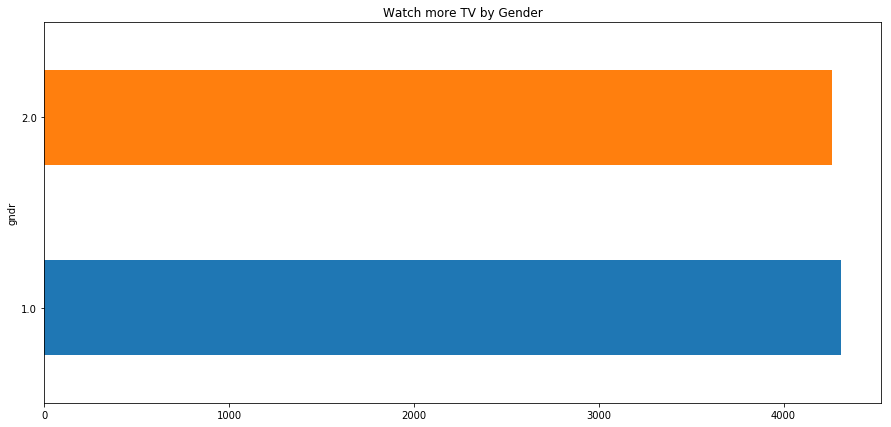

In [198]:
fig, ax = plt.subplots(figsize=(15,7))
survey_df['year'] == 6
tv_df = survey_df.groupby(['gndr']).count()['tvtot'].plot(kind='barh',ax=ax, title='Watch more TV by Gender')
tv_df

In [199]:
#4) Who was more likely to believe people were fair in 2012, 
#people living with a partner or people living alone?
#Answer: 1.0 = Lives with husband/wife/partner at household grid
#         2.0 = Does not
#People living with a partner are more likely to belive people are fair in 2012

In [200]:
survey_df['year'] == 6
pplfair_df = survey_df.groupby(['partner']).count()['pplfair']
pplfair_df

partner
1.0    5259
2.0    3280
Name: pplfair, dtype: int64

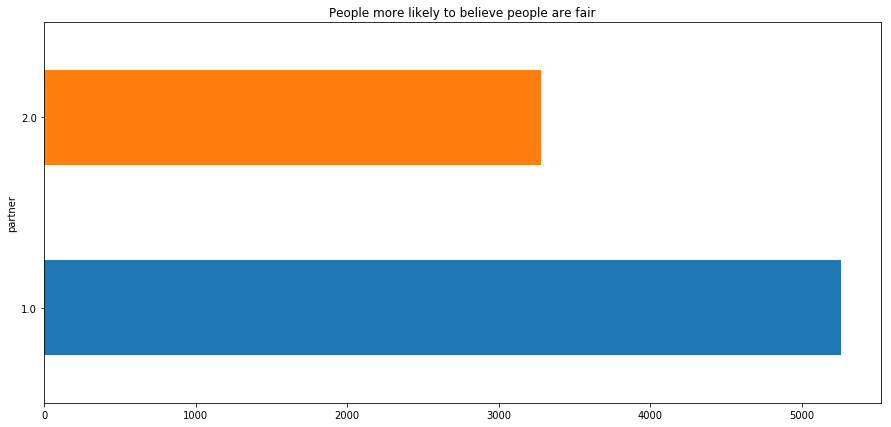

In [201]:
fig, ax = plt.subplots(figsize=(15,7))
survey_df['year'] == 6
tv_df = survey_df.groupby(['partner']).count()['pplfair'].plot(kind='barh',ax=ax, title='People more likely to believe people are fair')
tv_df

In [202]:
#5) Pick three or four of the countries in the sample and compare how often people 
#met socially in 2014. Are there differences, and if so, which countries stand out?
#Answer: The people in CH meet signifcally more than people in CZ or DE. DE is the country
#with the least amount of people that meet.

In [203]:
#To select a row based on multiple conditions you can use &:
array = ['CH','CZ','DE']
social_meet_df = survey_df.loc[(survey_df['year'] == 7) & survey_df['cntry'].isin(array)]
social_meet_df.head() 

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
773,CH,5.0,7,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
774,CH,25.0,7,4.0,4.0,2.0,5.0,6.0,5.0,3.0,1.0,30.0,1.0
775,CH,26.0,7,3.0,8.0,8.0,6.0,8.0,7.0,5.0,2.0,49.0,2.0
776,CH,28.0,7,2.0,7.0,7.0,5.0,9.0,6.0,2.0,1.0,51.0,1.0
777,CH,29.0,7,2.0,4.0,7.0,0.0,8.0,6.0,2.0,2.0,32.0,2.0


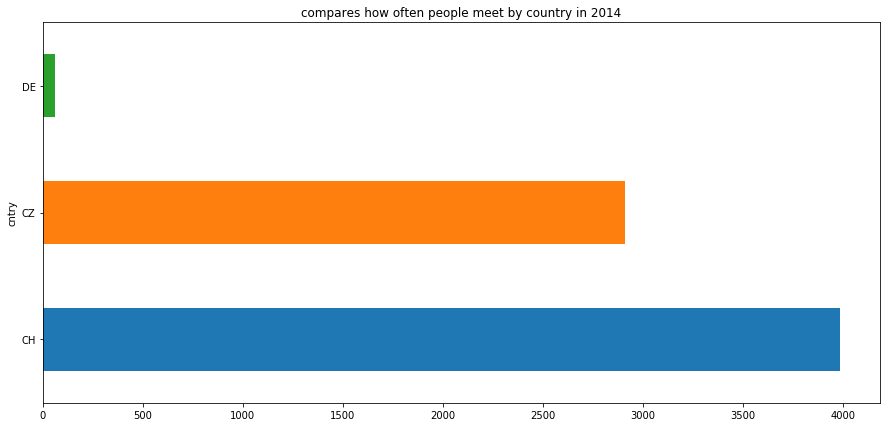

In [204]:
fig, ax = plt.subplots(figsize=(15,7))
social_df = social_meet_df.groupby(['cntry']).sum()['sclmeet'].plot(kind='barh',ax=ax, title='compares how often people meet by country in 2014')


In [205]:
#6) Pick three or four of the countries in the sample and compare how often people 
#took part in social activities, relative to others their age, in 2014. 
#Are there differences, and if so, which countries stand out?
#Answer: The people in ES have signifcally more activities than people in SE or NO. 
#NO is the country with the least amount of people that had social activities.

In [206]:
#To select a row based on multiple conditions you can use &:
array = ['ES','NO','SE']
social_act_df = survey_df.loc[(survey_df['year'] == 7) & survey_df['cntry'].isin(array)]
social_act_df.head() 

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
4103,ES,1.0,7,2.0,6.0,6.0,3.0,7.0,7.0,3.0,2.0,34.0,2.0
4104,ES,3.0,7,2.0,6.0,6.0,8.0,9.0,2.0,2.0,1.0,59.0,1.0
4105,ES,5.0,7,2.0,7.0,7.0,6.0,8.0,7.0,3.0,1.0,46.0,1.0
4106,ES,6.0,7,5.0,10.0,10.0,6.0,5.0,7.0,3.0,2.0,67.0,1.0
4107,ES,8.0,7,7.0,2.0,8.0,0.0,6.0,7.0,2.0,2.0,61.0,1.0


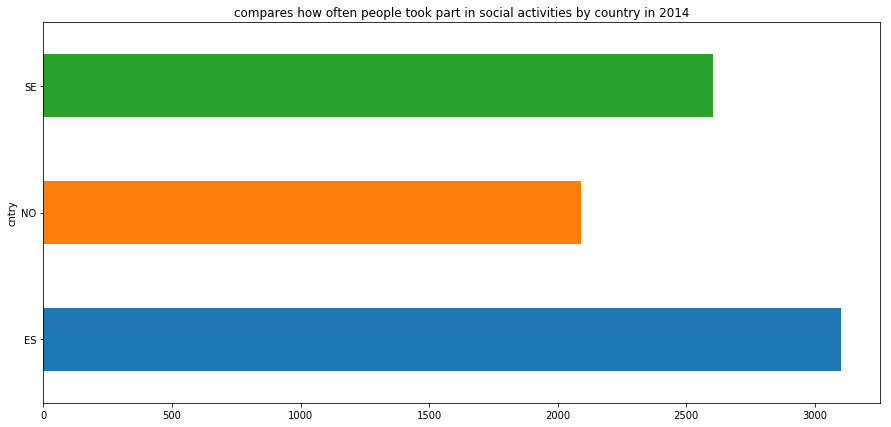

In [207]:
fig, ax = plt.subplots(figsize=(15,7))
socialact_df = social_act_df.groupby(['cntry']).sum()['sclact'].plot(kind='barh',ax=ax, title='compares how often people took part in social activities by country in 2014')

